In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("data.csv")

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.shape

(13320, 9)

In [5]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
df.groupby('location')['location'].agg('count').shape

(1305,)

In [7]:
df1=df.drop(['area_type', 'availability','society','balcony'], axis="columns")
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [8]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
df2=df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [10]:
df2.groupby('size')['size'].agg('count')

size
1 BHK          531
1 Bedroom      105
1 RK            13
10 BHK           2
10 Bedroom      12
11 BHK           2
11 Bedroom       2
12 Bedroom       1
13 BHK           1
14 BHK           1
16 BHK           1
18 Bedroom       1
19 BHK           1
2 BHK         5198
2 Bedroom      329
27 BHK           1
3 BHK         4286
3 Bedroom      546
4 BHK          577
4 Bedroom      818
43 Bedroom       1
5 BHK           57
5 Bedroom      296
6 BHK           30
6 Bedroom      191
7 BHK           17
7 Bedroom       83
8 BHK            5
8 Bedroom       84
9 BHK            8
9 Bedroom       46
Name: size, dtype: int64

In [11]:
df2['bhk']=df2['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\asus\AppData\Local\Temp\ipykernel_14788\1154073957.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk']=df2['size'].apply(lambda x: int(x.split(' ')[0]))


In [12]:
df2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [13]:
df3=df2.drop(['size'], axis="columns")
df3.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [14]:
df3[df3.bhk>10]

,location,total_sqft,bath,price,bhk
459,1 Giri Nagar,5000,9.0,360.0,11
1718,2Electronic City Phase II,8000,27.0,230.0,27
1768,1 Ramamurthy Nagar,1200,11.0,170.0,11
3379,1Hanuman Nagar,2000,16.0,490.0,19
3609,Koramangala Industrial Layout,10000,16.0,550.0,16
3853,1 Annasandrapalya,1200,6.0,150.0,11
4684,Munnekollal,2400,40.0,660.0,43
4916,1Channasandra,1250,15.0,125.0,14
6533,Mysore Road,2232,6.0,300.0,12
7979,1 Immadihalli,6000,12.0,150.0,11


In [15]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [16]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True
    

In [17]:
df3[~df3['total_sqft'].apply(is_float)]

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...
12975,Whitefield,850 - 1060,2.0,38.190,2
12990,Talaghattapura,1804 - 2273,3.0,122.000,3
13059,Harlur,1200 - 1470,2.0,72.760,2
13265,Hoodi,1133 - 1384,2.0,59.135,2


In [18]:
def convert_range_to_avg(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1])/2)
    try:
        return float(x)
    except:
        return None

In [19]:
df4=df3.copy()

In [20]:
df4['total_sqft']=df4['total_sqft'].apply(convert_range_to_avg)

In [21]:
df4.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [22]:
df4.total_sqft.unique()

array([1056., 2600., 1440., ..., 2758.,  774., 4689.])

In [23]:
df5=df4.copy()

In [24]:
df5['price_per_sqft']=df5['price']*100000/df5['total_sqft']
df5.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [25]:
len(df5.location.unique())

1304

In [26]:
df5.location=df5.location.apply(lambda x: x.strip())
location_stats=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [27]:
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [28]:
len(location_stats[location_stats<=10])

1052

In [29]:
location_stats_less_than_10=location_stats[location_stats<=10]
location_stats_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [30]:
df5.location=df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

In [31]:
len(df5.location.unique())

242

In [32]:
df5.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [33]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,total_sqft,bath,price,bhk,price_per_sqft
9,other,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,other,500.0,3.0,100.0,3,20000.000000


In [34]:
df6=df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12502, 6)

In [35]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6290.299983
std        4175.619211
min         267.829813
25%        4186.725844
50%        5281.690141
75%        6904.652015
max      176470.588235
Name: price_per_sqft, dtype: float64

In [36]:
def remove_outliers(df):
    df_out=pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        red_df=subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out, red_df], ignore_index=True)
    return df_out

df7=remove_outliers(df6)
df7.shape

(10231, 6)

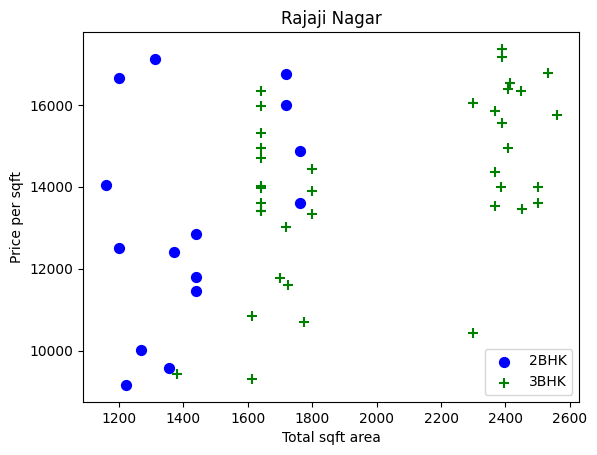

In [37]:
def scatter_plot(df, location):
    bhk2=df[(df.location==location) & (df.bhk==2)]
    bhk3=df[(df.location==location) & (df.bhk==3)]
    
    plt.scatter(bhk2.total_sqft, bhk2.price_per_sqft, color="blue", label="2BHK", s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price_per_sqft, marker="+",color="green", label="3BHK", s=50)
    plt.xlabel("Total sqft area")
    plt.ylabel("Price per sqft")
    plt.title(location)
    plt.legend()

scatter_plot(df7, "Rajaji Nagar")

In [38]:
def remove_bhk_outliers(df):
    excl_indx=np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats={}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0],                
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                excl_indx=np.append(excl_indx, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(excl_indx, axis="index")

df8=remove_bhk_outliers(df7)
df8.shape

(7326, 6)

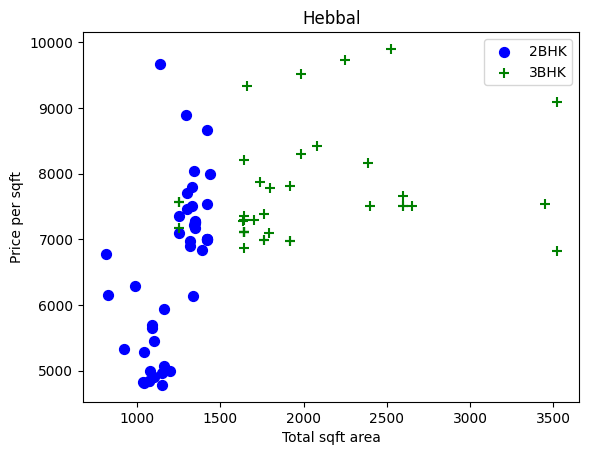

In [39]:
scatter_plot(df8, 'Hebbal')

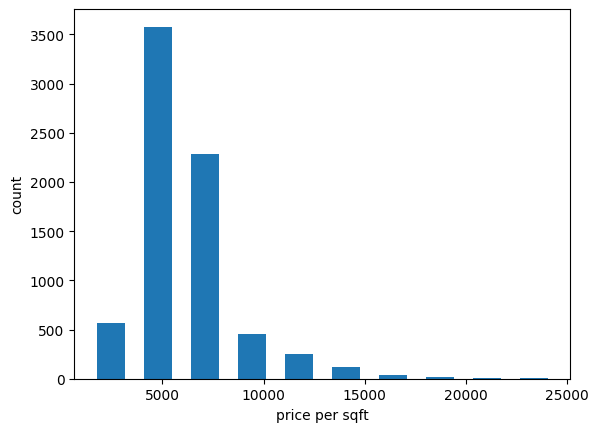

In [40]:
plt.hist(df8.price_per_sqft, rwidth=0.6)
plt.xlabel("price per sqft")
plt.ylabel("count")
plt.show()

In [41]:
df8.groupby('bath')['bath'].agg('count')

bath
1.0      551
2.0     4225
3.0     1761
4.0      500
5.0      172
6.0       77
7.0       15
8.0       13
9.0        7
12.0       3
13.0       1
16.0       1
Name: bath, dtype: int64

In [42]:
df8[df8.bath>10]

,location,total_sqft,bath,price,bhk,price_per_sqft
5273,Neeladri Nagar,4000.0,12.0,160.0,10,4000.000000
8476,other,12000.0,12.0,525.0,10,4375.000000
8565,other,10000.0,16.0,550.0,16,5500.000000
9298,other,6000.0,12.0,150.0,11,2500.000000
9629,other,5425.0,13.0,275.0,13,5069.124424


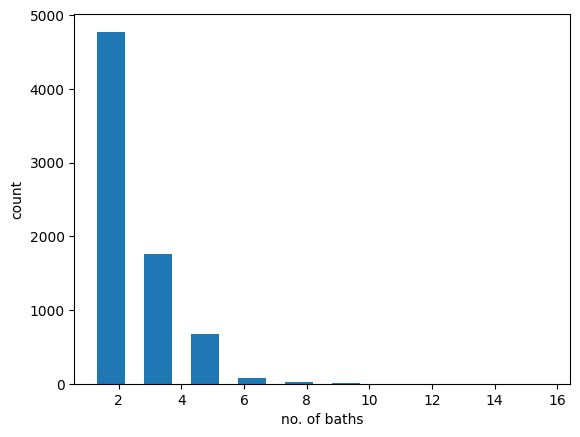

In [43]:
plt.hist(df8.bath, rwidth=0.6)
plt.xlabel("no. of baths")
plt.ylabel("count")
plt.show()

In [44]:
df8[df8.bath>df8.bhk+2]

,location,total_sqft,bath,price,bhk,price_per_sqft
1625,Chikkabanavar,2460.0,7.0,80.0,4,3252.032520
5234,Nagasandra,7000.0,8.0,450.0,4,6428.571429
6705,Thanisandra,1806.0,6.0,116.0,3,6423.034330
8401,other,11338.0,9.0,1000.0,6,8819.897689


In [45]:
df9=df8[df8.bath<df8.bhk+2]
df9.shape

(7252, 6)

In [46]:
df9.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668


In [47]:
df10=df9.drop(['price_per_sqft'], axis="columns")
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [48]:
df10.describe()

,total_sqft,bath,price,bhk
count,7252.000000,7252.000000,7252.000000,7252.000000
mean,1472.837323,2.412438,96.502661,2.484970
std,817.361154,0.933257,87.575750,0.907177
min,300.000000,1.000000,10.000000,1.000000
25%,1096.000000,2.000000,50.000000,2.000000
50%,1255.000000,2.000000,72.000000,2.000000
75%,1655.000000,3.000000,110.000000,3.000000
max,30000.000000,16.000000,2200.000000,16.000000


In [49]:
df10.shape

(7252, 5)

In [50]:
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [51]:
df10.to_csv("cleanData.csv")

In [52]:
X=df10.drop(['price'], axis="columns")
y=df10['price']

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [54]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=0)

In [55]:
colum_trans=make_column_transformer((OneHotEncoder(sparse=False),['location']),remainder='passthrough')

In [56]:
scaler=StandardScaler()

In [57]:
lr=LinearRegression()

In [58]:
pipe=make_pipeline(colum_trans,scaler,lr)

In [59]:
pipe.fit(X_train,y_train)

C:\Users\asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [60]:
y_pred_lr=pipe.predict(X_test)

In [61]:
r2_score(y_test,y_pred_lr)

0.834185487133519

In [62]:
las=Lasso()

In [63]:
pipe=make_pipeline(colum_trans,scaler,las)
pipe.fit(X_train,y_train)
y_pred_lr=pipe.predict(X_test)
r2_score(y_test,y_pred_lr)

C:\Users\asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.8198190239537758

In [64]:
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()

In [65]:
pipe=make_pipeline(colum_trans,scaler,dt)
pipe.fit(X_train,y_train)
y_pred_lr=pipe.predict(X_test)
r2_score(y_test,y_pred_lr)

C:\Users\asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.7611201462913326

In [66]:
pipe=make_pipeline(colum_trans,scaler,rf)
pipe.fit(X_train,y_train)
y_pred_lr=pipe.predict(X_test)
r2_score(y_test,y_pred_lr)

C:\Users\asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.8225992226179937

In [67]:
rg=Ridge()
pipe=make_pipeline(colum_trans,scaler,rg)
pipe.fit(X_train,y_train)
y_pred_lr=pipe.predict(X_test)
r2_score(y_test,y_pred_lr)

C:\Users\asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.8341635893574932

In [68]:
pipe=make_pipeline(colum_trans,scaler,lr)
pipe.fit(X_train,y_train)
y_pred_lr=pipe.predict(X_test)
r2_score(y_test,y_pred_lr)

C:\Users\asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.834185487133519

In [69]:
!pip install scikit-learn==1.3.0

In [70]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(pipe, file)